In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.set_printoptions(edgeitems=20, precision=3, linewidth=160)
#np.core.arrayprint._line_width = 180
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline

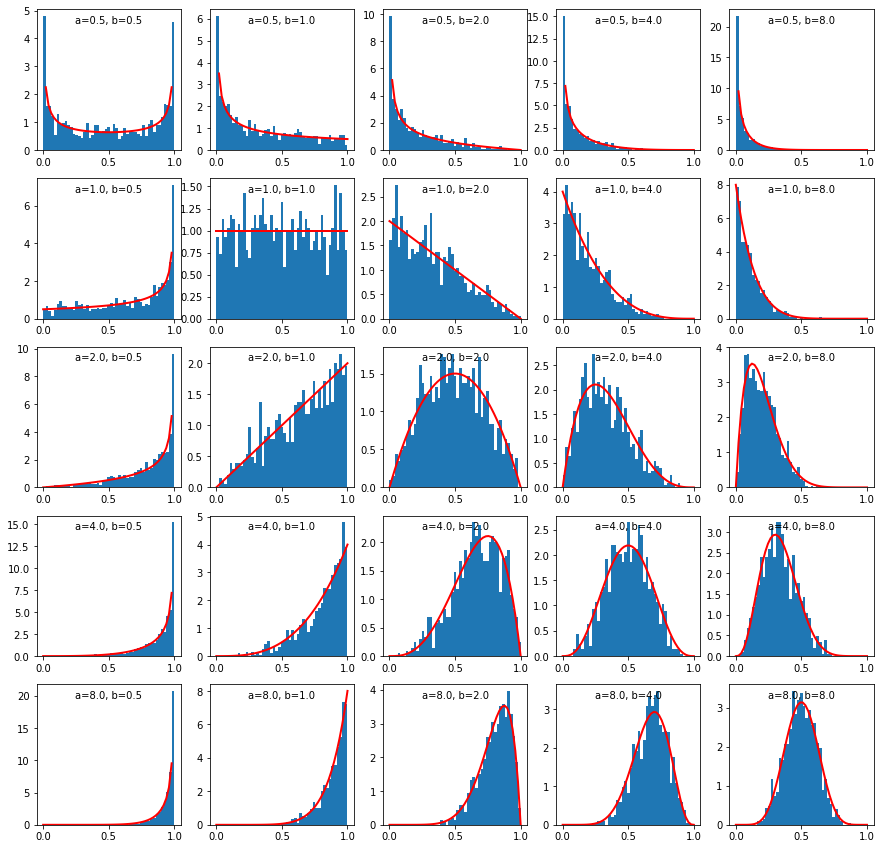

In [3]:
# beta
from scipy.stats import beta
a_s, b_s = (2**np.arange(5))*.5, (2**np.arange(5))*.5
fig, axs = plt.subplots(len(a_s), len(b_s), figsize=(15, 15))
bins = np.linspace(0, 1, 50)
for i_a, a in enumerate(a_s):
    for i_b, b in enumerate(b_s):
        ax = axs[i_a, i_b]
        s = np.random.beta(a, b, 1000)
        ax.hist(s, bins=bins, density=True)
        ax.plot(bins, beta.pdf(bins, a, b), 'r', lw=2)
        ax.text(.5, .9, f"a={a}, b={b}", horizontalalignment='center', transform = ax.transAxes)
plt.show()


# the switching binomial generative model


## likelihood function

In [4]:
import bayesianchangepoint as bcp
help(bcp.likelihood)

Help on function likelihood in module bayesianchangepoint.bcp:

likelihood(o, p, r)
    Knowing $p$ and $r$, the sufficient statistics of the beta distribution $B(lpha,eta)$ are:
    $$
        alpha = p*r
        beta  = (1-p)*r
    $$
    
    The likelihood of observing o=1 is that of a binomial of
    
        - mean rate of chosing hypothesis "o=1" = (p*r + o)/(r+1)
        - number of choices where  "o=1" equals to p*r+1 and "o=0" equals to (1-p)*r+1
    
    since both likelihood sum to 1, the likelihood of drawing o in the set {0, 1}
    is equal to



In [5]:
for p_ in [0, .25, .5, .75, 1]:
    for r in (2**np.arange(5)-1):
        print('Knowing p=%.2f' % p_, 'and r=%2d' % r, 
              ', the likelihood for 0=%.3f' % bcp.likelihood(0, p_, r), 
              '- for 1=%.3f' % bcp.likelihood(1, p_, r), 
              '- sum=%.3f' % (bcp.likelihood(0, p_, r)+bcp.likelihood(1, p_, r)) )

Knowing p=0.00 and r= 0 , the likelihood for 0=0.500 - for 1=0.500 - sum=1.000
Knowing p=0.00 and r= 1 , the likelihood for 0=0.800 - for 1=0.200 - sum=1.000
Knowing p=0.00 and r= 3 , the likelihood for 0=0.905 - for 1=0.095 - sum=1.000
Knowing p=0.00 and r= 7 , the likelihood for 0=0.953 - for 1=0.047 - sum=1.000
Knowing p=0.00 and r=15 , the likelihood for 0=0.977 - for 1=0.023 - sum=1.000
Knowing p=0.25 and r= 0 , the likelihood for 0=0.500 - for 1=0.500 - sum=1.000
Knowing p=0.25 and r= 1 , the likelihood for 0=0.639 - for 1=0.361 - sum=1.000
Knowing p=0.25 and r= 3 , the likelihood for 0=0.692 - for 1=0.308 - sum=1.000
Knowing p=0.25 and r= 7 , the likelihood for 0=0.720 - for 1=0.280 - sum=1.000
Knowing p=0.25 and r=15 , the likelihood for 0=0.735 - for 1=0.265 - sum=1.000
Knowing p=0.50 and r= 0 , the likelihood for 0=0.500 - for 1=0.500 - sum=1.000
Knowing p=0.50 and r= 1 , the likelihood for 0=0.500 - for 1=0.500 - sum=1.000
Knowing p=0.50 and r= 3 , the likelihood for 0=0.500

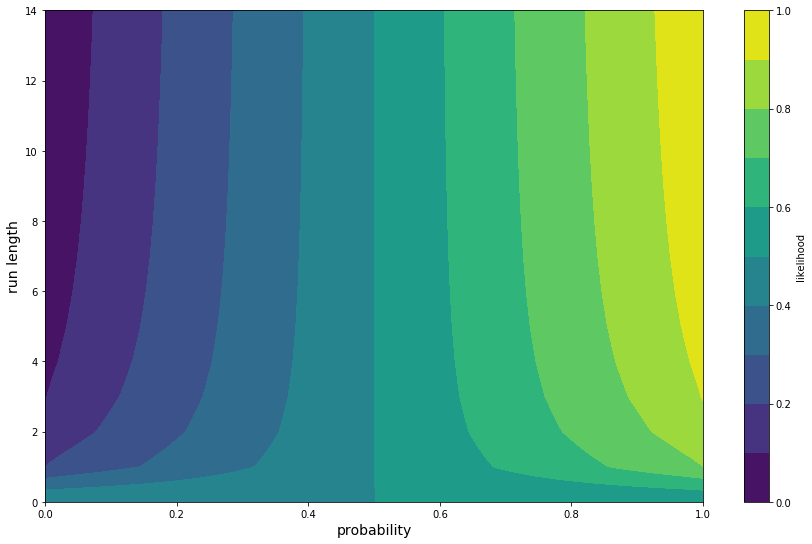

In [6]:
fig_width= fig_width
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180), sharex=True)

p, r = np.meshgrid(np.linspace(0., 1., 200, endpoint=True), np.arange(15))

L = bcp.likelihood(o=1, p=p, r=r)

#CS = ax.pcolormesh(p, r, L)

CS = ax.contourf(p, r, L, levels=np.linspace(0., 1., 11, endpoint=True))

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('likelihood')

fig.tight_layout()
ax.set_ylabel('run length', fontsize=14)
#axs[i_layer].axis('tight')
ax.set_xlabel('probability', fontsize=14);

In [7]:
p, r = np.meshgrid(np.linspace(0., 1., 17, endpoint=True), np.arange(15))
L = bcp.likelihood(o=1, p=p, r=r)
print(L)

[[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5  ]
 [0.2   0.249 0.288 0.325 0.361 0.396 0.431 0.466 0.5   0.534 0.569 0.604 0.639 0.675 0.712 0.751 0.8  ]
 [0.129 0.188 0.236 0.281 0.326 0.37  0.413 0.457 0.5   0.543 0.587 0.63  0.674 0.719 0.764 0.812 0.871]
 [0.095 0.158 0.209 0.259 0.308 0.356 0.404 0.452 0.5   0.548 0.596 0.644 0.692 0.741 0.791 0.842 0.905]
 [0.076 0.14  0.193 0.245 0.297 0.348 0.399 0.449 0.5   0.551 0.601 0.652 0.703 0.755 0.807 0.86  0.924]
 [0.063 0.127 0.182 0.236 0.289 0.342 0.395 0.447 0.5   0.553 0.605 0.658 0.711 0.764 0.818 0.873 0.937]
 [0.054 0.119 0.175 0.23  0.284 0.338 0.392 0.446 0.5   0.554 0.608 0.662 0.716 0.77  0.825 0.881 0.946]
 [0.047 0.112 0.169 0.224 0.28  0.335 0.39  0.445 0.5   0.555 0.61  0.665 0.72  0.776 0.831 0.888 0.953]
 [0.042 0.107 0.164 0.221 0.277 0.333 0.388 0.444 0.5   0.556 0.612 0.667 0.723 0.779 0.836 0.893 0.958]
 [0.037 0.103 0.16  0.217 0.274 0.331 0.387 0.444 0.5  

## performing inference: application to synthetic data

time 0 ; obs= 0 ; beliefs= [1.] ; pi_hat= [0.5] ; 1-h= 0.8 ; p_bar= [0.5] ; r_bar= [1.]
time 1 ; obs= 1 ; beliefs= [0.2 0.8] ; pi_hat= [0.5   0.326] ; 1-h= 0.8 ; p_bar= [0.5  0.25] ; r_bar= [1. 2.]
time 2 ; obs= 0 ; beliefs= [0.2   0.222 0.578] ; pi_hat= [0.5   0.326 0.5  ] ; 1-h= 0.8 ; p_bar= [0.5  0.75 0.5 ] ; r_bar= [1. 2. 3.]
time 3 ; obs= 0 ; beliefs= [0.2   0.173 0.125 0.501] ; pi_hat= [0.5   0.674 0.5   0.601] ; 1-h= 0.8 ; p_bar= [0.5   0.25  0.5   0.375] ; r_bar= [1. 2. 3. 4.]
time 4 ; obs= 0 ; beliefs= [0.2   0.138 0.161 0.086 0.415] ; pi_hat= [0.5   0.674 0.758 0.601 0.668] ; 1-h= 0.8 ; p_bar= [0.5   0.25  0.167 0.375 0.3  ] ; r_bar= [1. 2. 3. 4. 5.]
time 5 ; obs= 1 ; beliefs= [0.2   0.124 0.115 0.151 0.064 0.345] ; pi_hat= [0.5   0.326 0.242 0.193 0.332 0.284] ; 1-h= 0.8 ; p_bar= [0.5   0.25  0.167 0.125 0.3   0.25 ] ; r_bar= [1. 2. 3. 4. 5. 6.]
time 6 ; obs= 1 ; beliefs= [0.2   0.252 0.102 0.071 0.074 0.054 0.247] ; pi_hat= [0.5   0.674 0.5   0.399 0.332 0.428 0.374] ; 1-h=

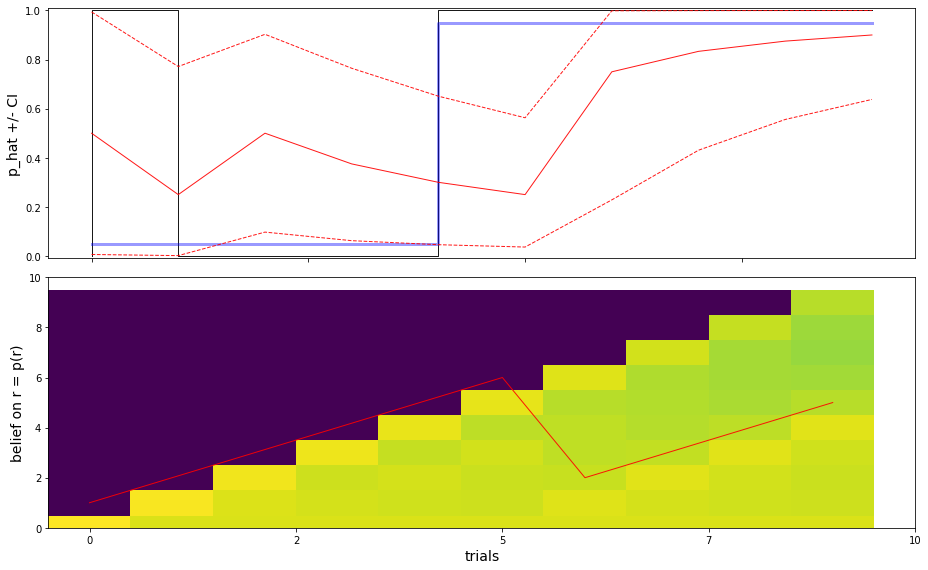

In [8]:
T = 10
mode = 'max'
Jeffreys = False
Jeffreys = True
p_gen = .05 * np.ones(T)
p_gen[5:] = .95
np.random.seed(51)
o = 1 * (p_gen > np.random.rand(T))

p_bar, r, beliefs = bcp.inference(o, h=1/5, p0=.5, r0=2. - Jeffreys, verbose=True)
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=T, mode=mode)

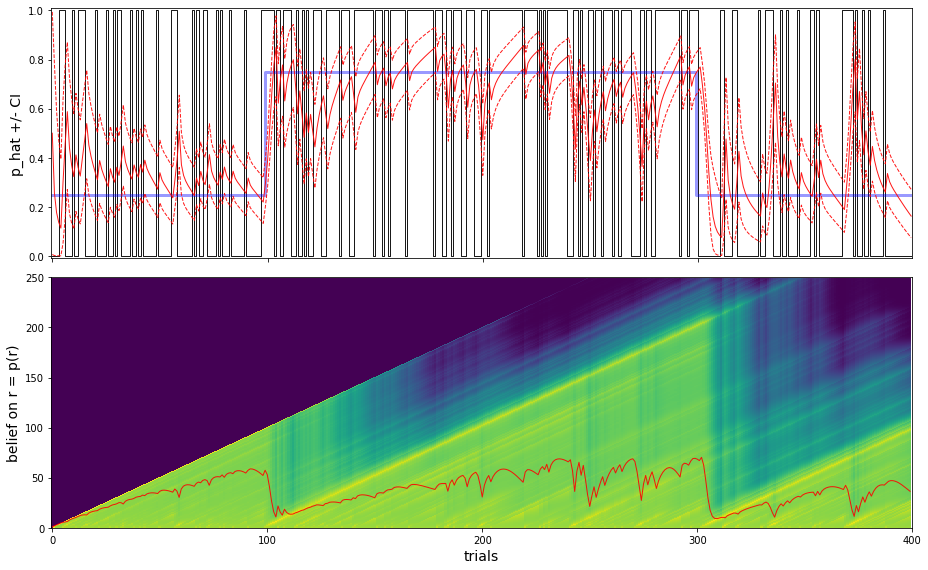

In [9]:
T = 400
mode = 'mean'
p_gen = .25 * np.ones(T)
p_gen[100:300] = .75
np.random.seed(42)
o = 1 * (p_gen > np.random.rand(T))

p_bar, r, beliefs = bcp.inference(o, h=1/40, p0=.5, verbose=False)
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode=mode)

## different read-outs

The full Bayesian models provides with a probabilistic representation of the pdf of $p$ for all possible run-length values. 
Instead of using the expectation (as above), one could use another readout mode, such as to take the run-length with maximal probability:

In [10]:
tau = 100
p_bar, r_bar, beliefs = bcp.inference(o, h=1/tau, p0=.5)

In [11]:

bcp.likelihood(o[None, :], p_bar, r_bar).shape, beliefs.shape


((400, 400), (400, 400))

In [12]:
beliefs.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [13]:

(bcp.likelihood(o[None, :], p_bar, r_bar)*beliefs).sum(axis=0)


array([0.5  , 0.673, 0.754, 0.802, 0.166, 0.302, 0.412, 0.492, 0.579, 0.627, 0.337, 0.601, 0.636, 0.337, 0.387, 0.435, 0.516, 0.564, 0.593, 0.618, 0.64 ,
       0.34 , 0.617, 0.639, 0.656, 0.673, 0.312, 0.649, 0.667, 0.319, 0.648, 0.335, 0.366, 0.598, 0.627, 0.644, 0.657, 0.33 , 0.64 , 0.656, 0.333, 0.641,
       0.344, 0.63 , 0.646, 0.658, 0.668, 0.678, 0.688, 0.302, 0.667, 0.681, 0.69 , 0.699, 0.708, 0.718, 0.273, 0.308, 0.344, 0.599, 0.657, 0.676, 0.687,
       0.696, 0.704, 0.713, 0.279, 0.69 , 0.297, 0.677, 0.691, 0.3  , 0.324, 0.643, 0.671, 0.683, 0.691, 0.301, 0.675, 0.313, 0.664, 0.679, 0.687, 0.305,
       0.673, 0.685, 0.692, 0.699, 0.705, 0.712, 0.282, 0.692, 0.703, 0.71 , 0.717, 0.723, 0.729, 0.736, 0.256, 0.289, 0.326, 0.391, 0.5  , 0.636, 0.248,
       0.522, 0.629, 0.286, 0.565, 0.647, 0.708, 0.749, 0.223, 0.305, 0.604, 0.335, 0.41 , 0.514, 0.421, 0.516, 0.431, 0.486, 0.463, 0.515, 0.558, 0.594,
       0.375, 0.423, 0.534, 0.571, 0.599, 0.622, 0.643, 0.662, 0.321, 0.637,

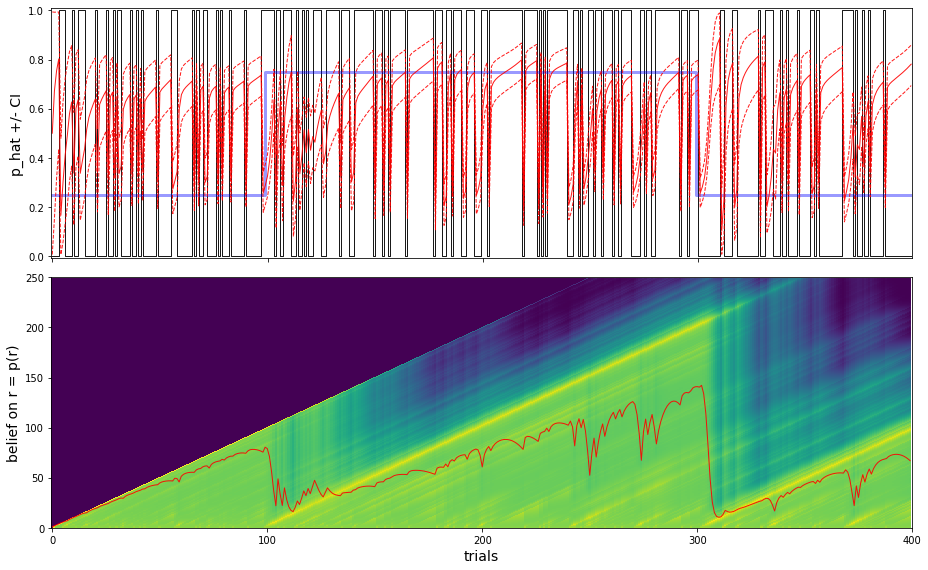

In [14]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r_bar, beliefs, max_run_length=250, mode='pred')

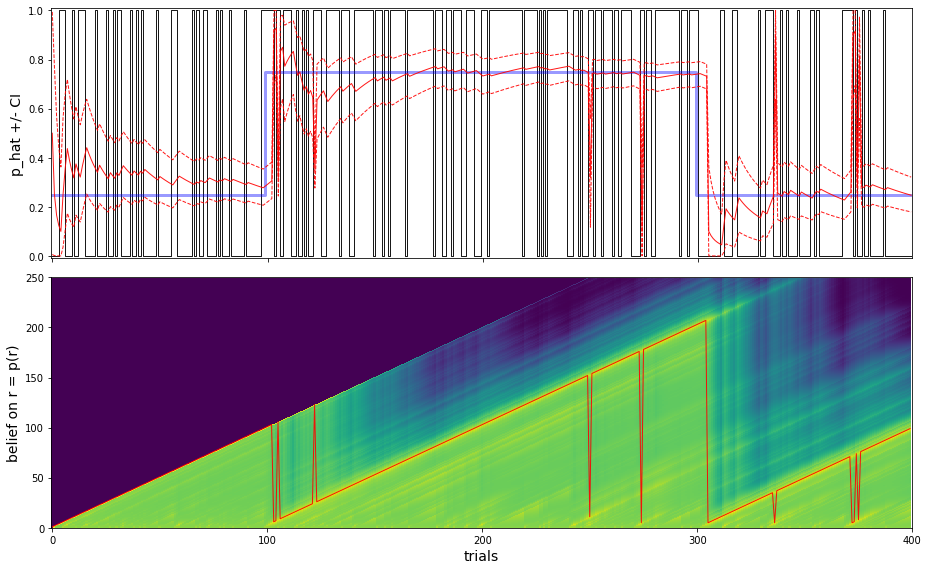

In [15]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r_bar, beliefs, max_run_length=250, mode='max')

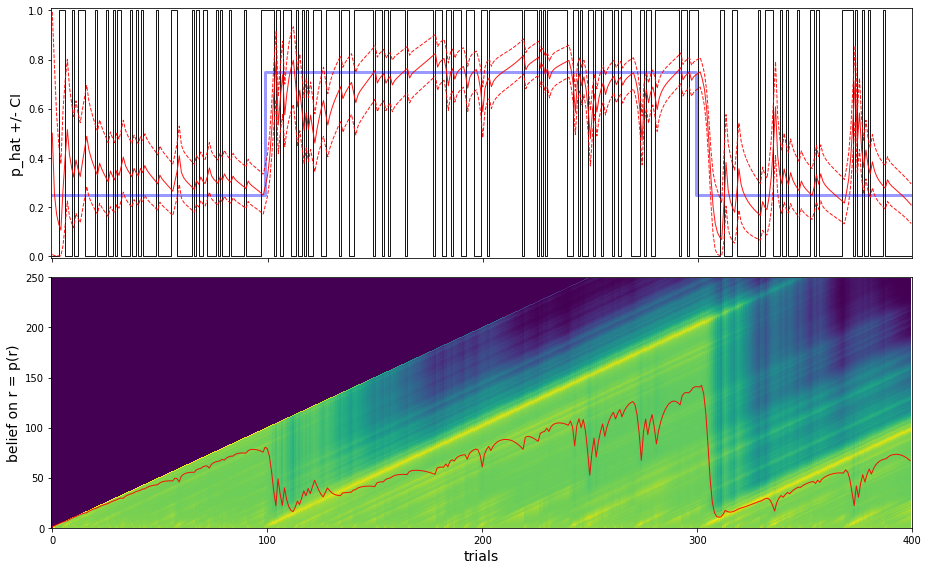

In [16]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r_bar, beliefs, max_run_length=250, mode='mean')

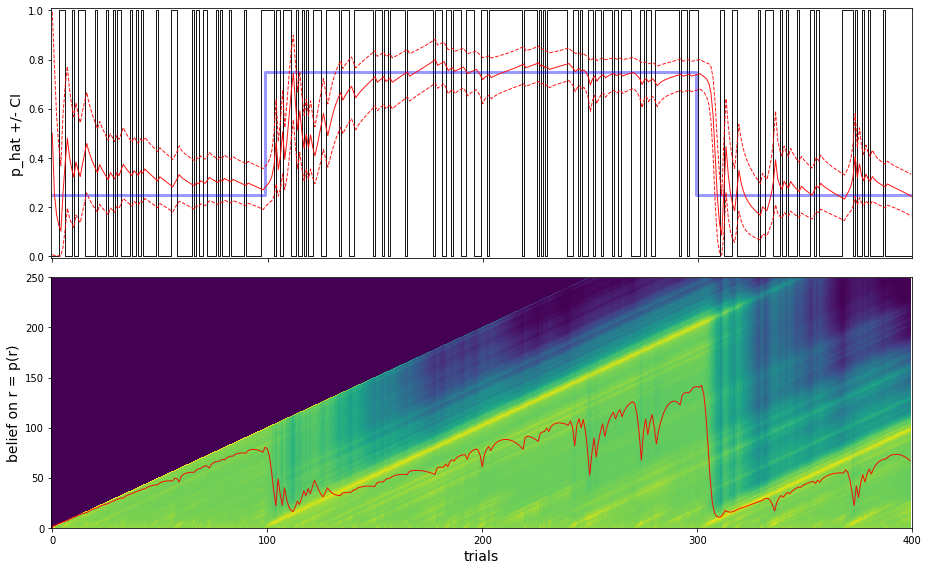

In [17]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r_bar, beliefs, max_run_length=250, mode='expectation')

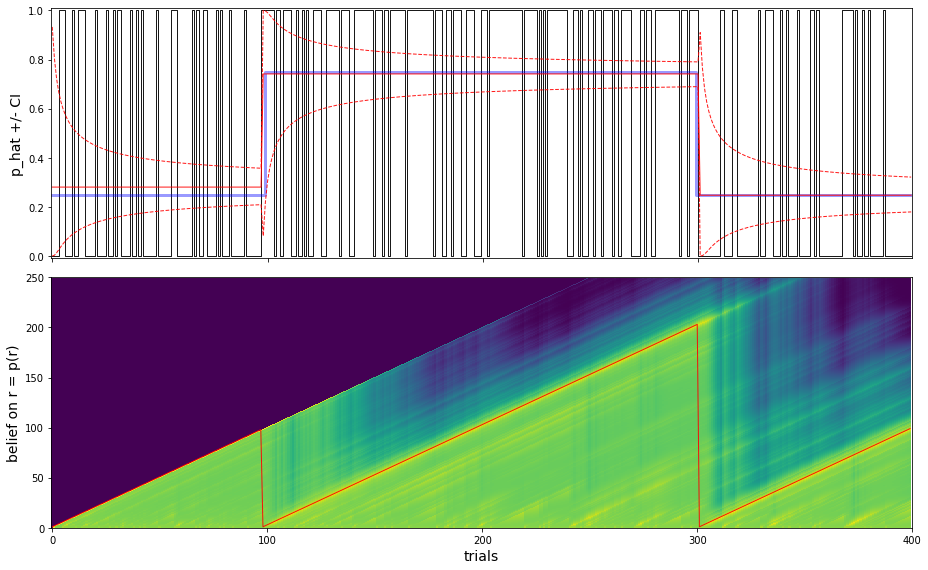

In [18]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r_bar, beliefs, max_run_length=250, mode='hindsight')

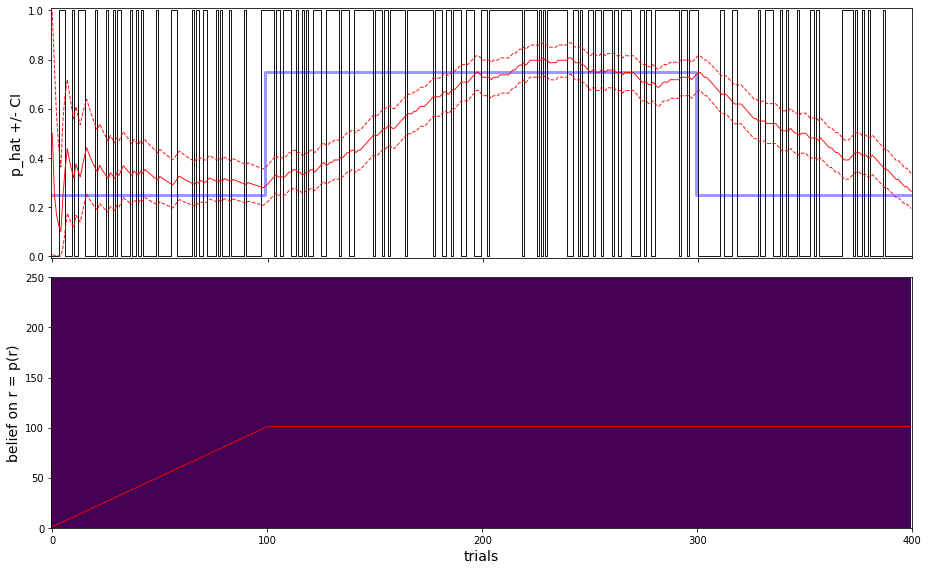

In [19]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r_bar, beliefs, max_run_length=250, mode='fixed', fixed_window_size=tau)

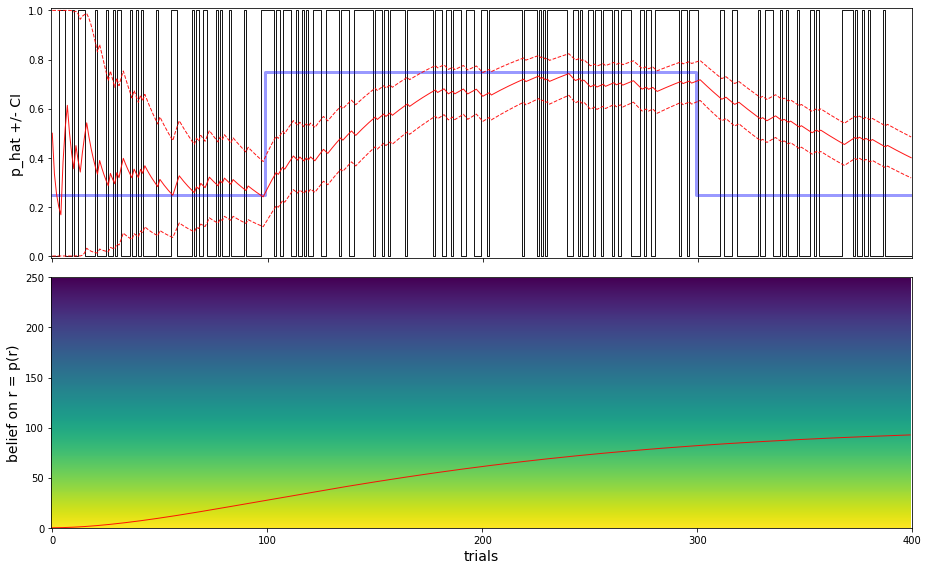

In [20]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r_bar, beliefs, max_run_length=250, mode='leaky', fixed_window_size=tau)

## testing different hazard rates

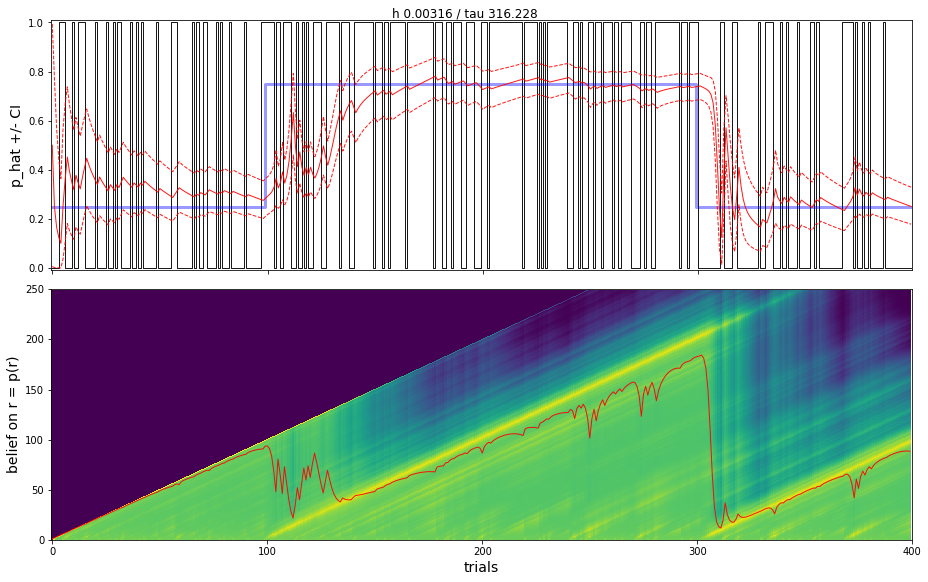

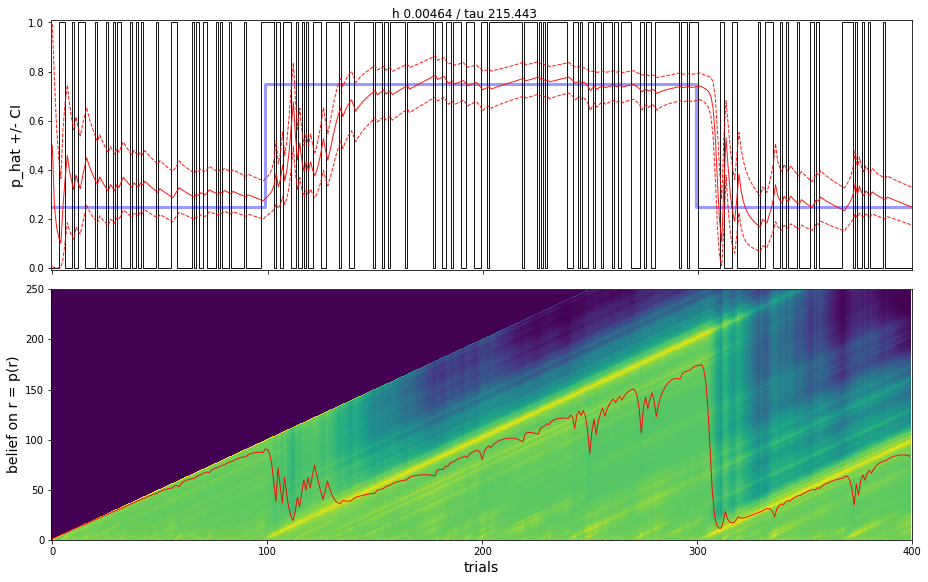

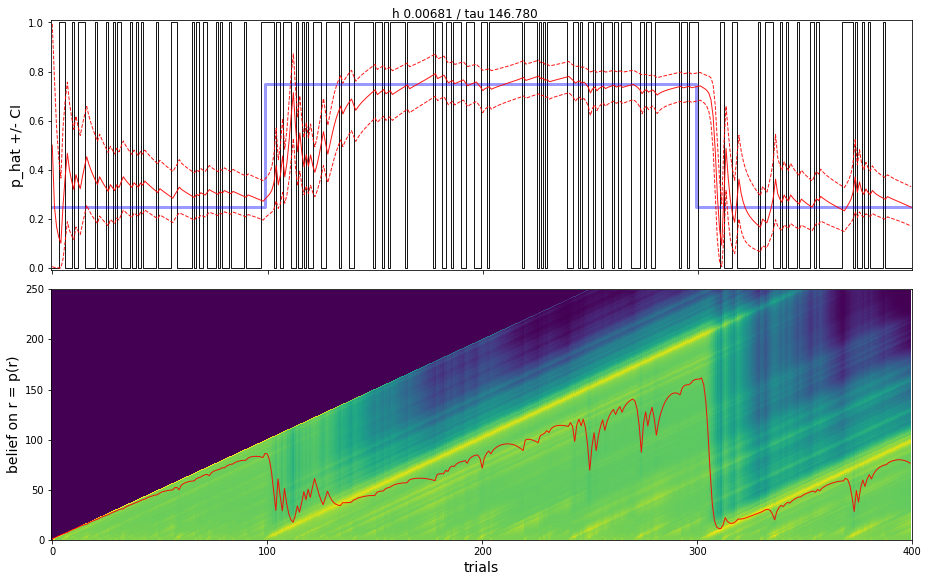

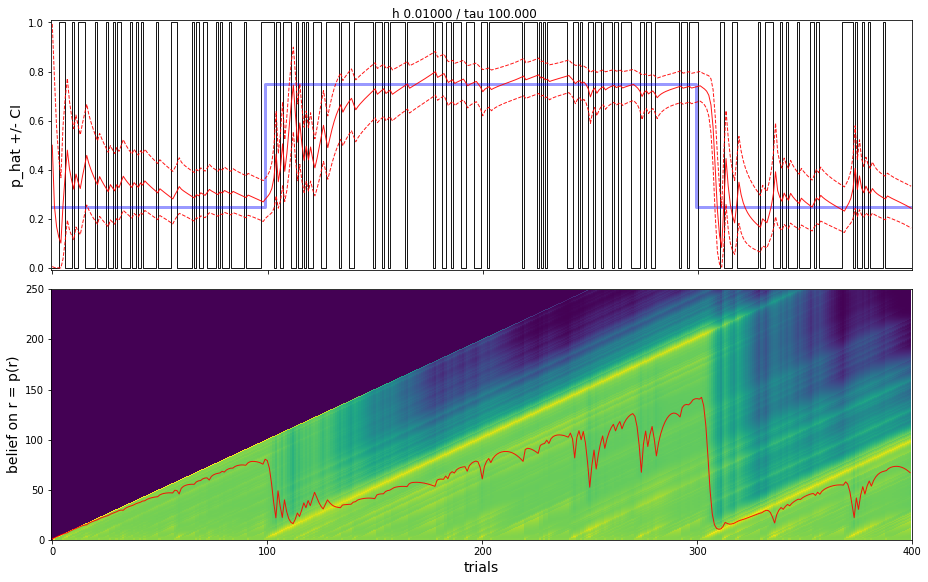

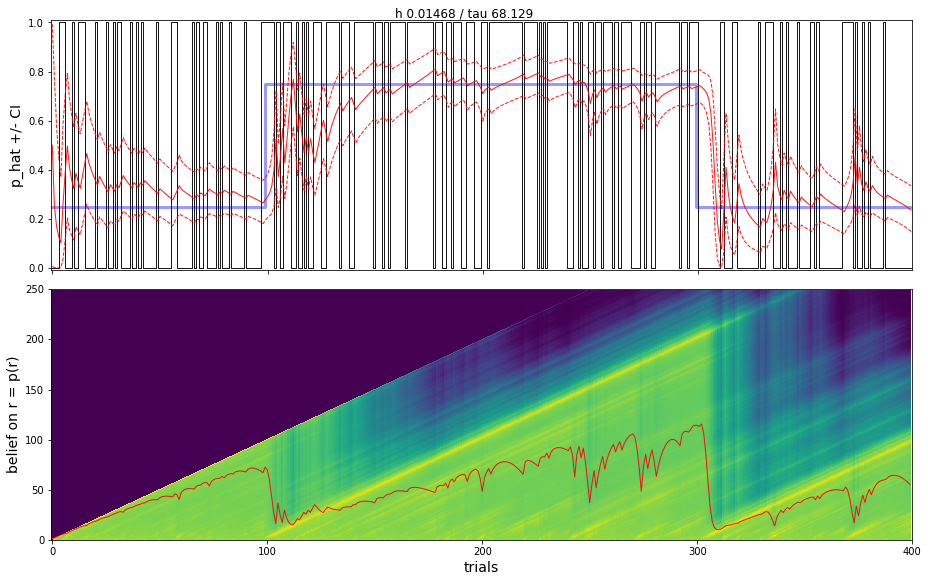

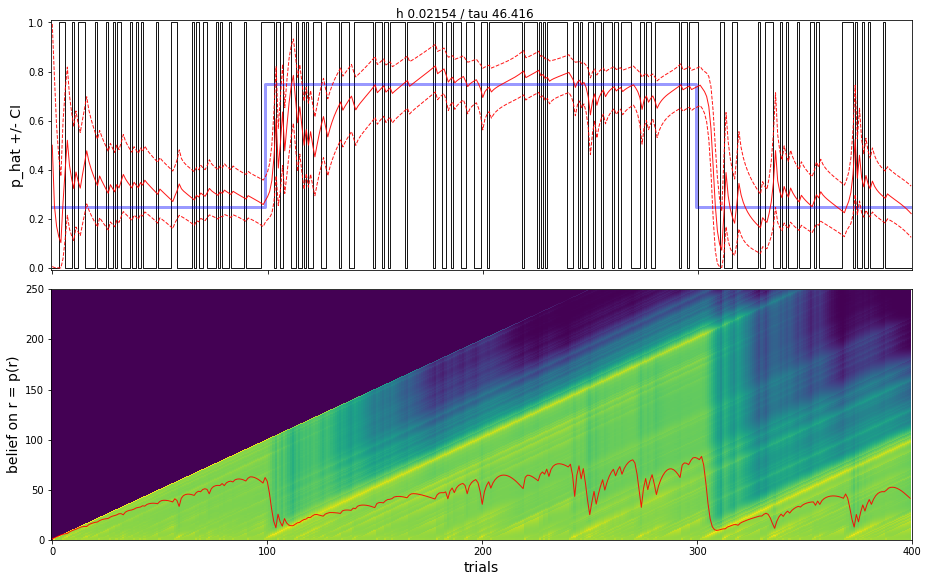

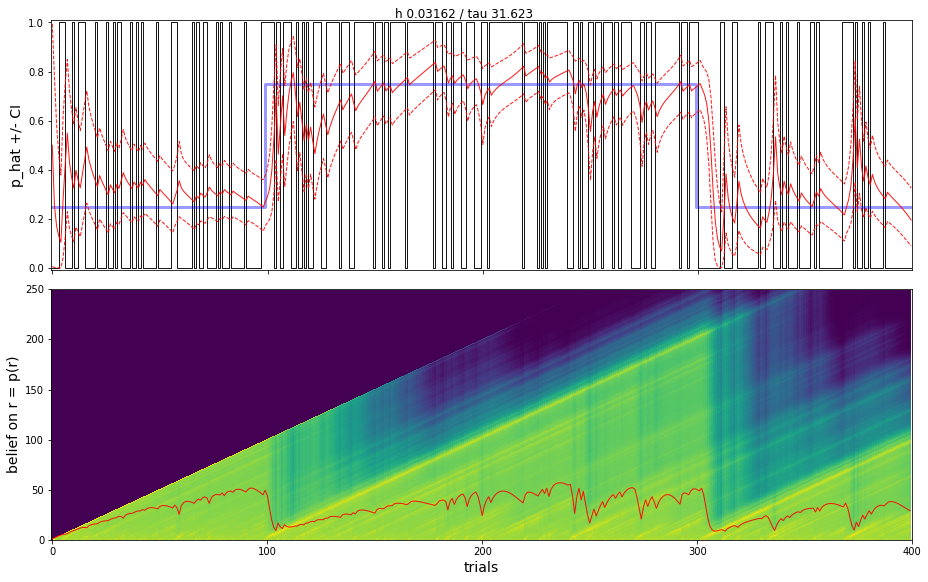

In [21]:
mode = 'max'
mode = 'mean'
mode = 'expectation'
hs = 1./tau * np.logspace(-.5, .5, 7, endpoint=True)
for h_ in hs:
    p_bar, r, beliefs = bcp.inference(o, h=h_, p0=.5)
    fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode=mode)
    fig.suptitle('h %.5f' % h_ + ' / tau %.3f' % (1/h_), y=1)
    plt.show()